# Lesson 3: Perceptron Algorithm

## Problem

Implement the perceptron algorithm to separate the data given in file data.csv.

Recall that the perceptron step works as follows. For a point with coordinates (p,q), label y, and prediction given by the equation y_hat = step(w_1x_1 + w_2x_2 + b):
- If the point is correctly classified, do nothing.
- If the point is classified positive, but it has a negative label, subtract alaph_p, alpha_q, and alpha from w_1, w_2, and b respectively.
- If the point is classified negative, but it has a positive label, and alpha_p, alpha_q, and alpha to w_1, w_2, and b respectively.

We starty by importing `numpy` and providing a random seed.

In [114]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(42)

Next, we define the `stepFunction` function:

In [115]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

We define the `prediction` function:

In [116]:
def prediction (X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

The `perceptronStep` function should receive as inputs the data X, the labels y, the weights W (as an array), and the bias b. Update the weights and bias according to the perceptron algorithm. Finally, return W and b.

In [117]:
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i] - y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

The `trainPerceptronAlgorithm` function runs the perceptron algorithm repeatedly on the dataset, and returns a few of the boundary lines obtained in the iterationss, for plotting purposes.

In [118]:
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plottebd below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [119]:
train_data = pd.read_csv('data.csv', header = None)
X = train_data.iloc[:,:-1]
X = X.values.reshape(100,2)
print(X)

[[ 0.78051   -0.063669 ]
 [ 0.28774    0.29139  ]
 [ 0.40714    0.17878  ]
 [ 0.2923     0.4217   ]
 [ 0.50922    0.35256  ]
 [ 0.27785    0.10802  ]
 [ 0.27527    0.33223  ]
 [ 0.43999    0.31245  ]
 [ 0.33557    0.42984  ]
 [ 0.23448    0.24986  ]
 [ 0.0084492  0.13658  ]
 [ 0.12419    0.33595  ]
 [ 0.25644    0.42624  ]
 [ 0.4591     0.40426  ]
 [ 0.44547    0.45117  ]
 [ 0.42218    0.20118  ]
 [ 0.49563    0.21445  ]
 [ 0.30848    0.24306  ]
 [ 0.39707    0.44438  ]
 [ 0.32945    0.39217  ]
 [ 0.40739    0.40271  ]
 [ 0.3106     0.50702  ]
 [ 0.49638    0.45384  ]
 [ 0.10073    0.32053  ]
 [ 0.69907    0.37307  ]
 [ 0.29767    0.69648  ]
 [ 0.15099    0.57341  ]
 [ 0.16427    0.27759  ]
 [ 0.33259    0.055964 ]
 [ 0.53741    0.28637  ]
 [ 0.19503    0.36879  ]
 [ 0.40278    0.035148 ]
 [ 0.21296    0.55169  ]
 [ 0.48447    0.56991  ]
 [ 0.25476    0.34596  ]
 [ 0.21726    0.28641  ]
 [ 0.67078    0.46538  ]
 [ 0.3815     0.4622   ]
 [ 0.53838    0.32774  ]
 [ 0.4849     0.26071  ]


In [120]:
y = train_data.iloc[:,-1]
print(y)

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: 2, Length: 100, dtype: int64


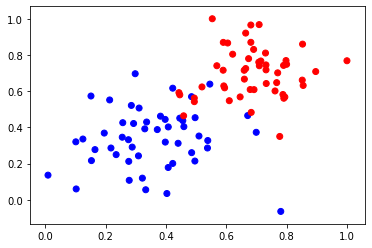

In [121]:
colors = ['red','blue']
plt.scatter(X[:,0],X[:,1], c=y, cmap=matplotlib.colors.ListedColormap(colors))

In [122]:
myBoundaryLines = trainPerceptronAlgorithm(X, y)
print(myBoundaryLines)

[(array([-0.05239463]), array([-2.04919443])), (array([1.23772563]), array([-2.90815949])), (array([-39.47663703]), array([23.57864461])), (array([-13.13237331]), array([7.06473087])), (array([-9.11612538]), array([4.57527519])), (array([-7.79056954]), array([3.96940892])), (array([-6.7750263]), array([3.50523881])), (array([-5.97212608]), array([3.13826056])), (array([-5.32141098]), array([2.84084093])), (array([-4.78335796]), array([2.59491529])), (array([-4.33103935]), array([2.38817591])), (array([-4.09146109]), array([2.3928177])), (array([-3.80251597]), array([2.25914697])), (array([-3.54414571]), array([2.13962066])), (array([-3.31174122]), array([2.03210655])), (array([-3.10157551]), array([1.93488045])), (array([-2.91060228]), array([1.84653311])), (array([-2.73630733]), array([1.76590142])), (array([-2.57659722]), array([1.69201691])), (array([-2.4297148]), array([1.6240667])), (array([-2.29417429]), array([1.56136344])), (array([-2.16871083]), array([1.50332199])), (array([-

-0.063669
1.0
slope: [-0.05239463]
intercept: [-2.04919443]
[array([[-0.05239463,  1.23772563],
       [-2.04919443, -2.90815949]])]
counter: 25


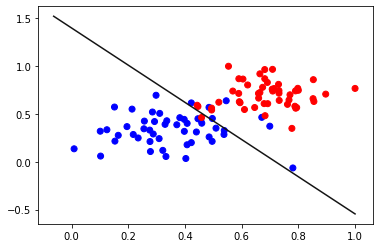

In [138]:
plt.figure()
X_min = X.min()
print(X_min)
X_max = X.max()
print(X_max)
print("slope: {0}".format(myBoundaryLines[0][0]))
print("intercept: {0}".format(myBoundaryLines[0][1]))
regression_coef = [np.hstack((myBoundaryLines[0],myBoundaryLines[1]))]
print(regression_coef)
#counter = len(regression_coef)
counter = len(myBoundaryLines)
print("counter: {}".format(counter))
#for W, b in regression_coef:
for W, b in myBoundaryLines:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    if counter == 1:
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
#plt.scatter(X, y, zorder = 3)
plt.scatter(X[:,0],X[:,1], c=y, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()